<a href="https://colab.research.google.com/github/jkarya/FedEx-Logistics-Performance-Analysis/blob/main/FedEx_Logistics_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Overview**

This project focuses on analyzing the global supply chain operations of FedEx Logistics, with the goal of uncovering insights that can optimize shipment processes, minimize freight costs, and improve delivery efficiency. The dataset contains detailed information about purchase orders, shipment methods, vendor agreements (INCO terms), delivery schedules, and product-specific details such as item descriptions and quantities. Through data analysis, this project aims to streamline the supply chain and enhance decision-making for cost-effective logistics management.

**Business Objectives**

Business Objectives
The key objectives of this project are:

To provide in-depth insights into freight costs across various shipment methods and countries.

To analyze vendor contributions to shipment quantities and total line item values.

To explore the relationship between shipment weight, item quantities, and freight cost for better budgeting and forecasting.

To identify bottlenecks or delays in the supply chain by analyzing delivery times and shipment performance.

**Dataset Description**


The dataset captures logistics data from FedEx, including:

Shipment Mode: Different methods used for shipping (Air, Sea, etc.)
.
Freight Cost (USD): The cost associated with shipping an item.

INCO Terms: International shipping terms used in contracts.

Delivery Dates: Scheduled and actual delivery dates for shipments.

Line Item Quantity: The number of items in each shipment.

Country: Destination country for each shipment.

Vendor: The source of the shipment.

**Tools and Libraries**

Python: For data processing and analysis.

Pandas: For data manipulation and cleaning.

NumPy: For numerical computations.


Matplotlib and Seaborn: For data visualization (static and statistical visualizations).

Plotly: For creating interactive visualizations.

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load Dataset
data=pd.read_csv('/content/SCMS_Delivery_History_Dataset.csv')

In [ ]:
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


**1. Basic Data Overview**

In [ ]:
# Dataset shape (rows, columns)
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (10324, 33)


In [ ]:
# Summary of the dataset
print(data.describe())

                 ID  Unit of Measure (Per Pack)  Line Item Quantity  \
count  10324.000000                10324.000000        10324.000000   
mean   51098.968229                   77.990895        18332.534870   
std    31944.332496                   76.579764        40035.302961   
min        1.000000                    1.000000            1.000000   
25%    12795.750000                   30.000000          408.000000   
50%    57540.500000                   60.000000         3000.000000   
75%    83648.250000                   90.000000        17039.750000   
max    86823.000000                 1000.000000       619999.000000   

       Line Item Value    Pack Price    Unit Price  Line Item Insurance (USD)  
count     1.032400e+04  10324.000000  10324.000000               10037.000000  
mean      1.576506e+05     21.910241      0.611701                 240.117626  
std       3.452921e+05     45.609223      3.275808                 500.190568  
min       0.000000e+00      0.000000    

In [ ]:
# Checking for null values
null_values = data.isnull().sum()
print(null_values[null_values > 0])

Shipment Mode                 360
Dosage                       1736
Line Item Insurance (USD)     287
dtype: int64


**2. Data Cleaning**

In [ ]:
# Checking for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
# Dropping duplicates if any
data_cleaned = data.drop_duplicates()

# Filling missing values in 'Freight Cost (USD)' and 'Line Item Insurance (USD)' with 0
data_cleaned['Freight Cost (USD)'].fillna(0, inplace=True)
data_cleaned['Line Item Insurance (USD)'].fillna(0, inplace=True)

# For categorical columns, we may use mode to fill missing values
data_cleaned['Vendor'].fillna(data_cleaned['Vendor'].mode()[0], inplace=True)

<ipython-input-82-1f63db0b42c1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Freight Cost (USD)'].fillna(0, inplace=True)
<ipython-input-82-1f63db0b42c1>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

**3. Descriptive Statistics**

In [ ]:
# Descriptive statistics for numerical columns
numerical_columns = ['Line Item Quantity', 'Line Item Value', 'Freight Cost (USD)',
                     'Weight (Kilograms)', 'Line Item Insurance (USD)']
print(data_cleaned[numerical_columns].describe())


       Line Item Quantity  Line Item Value  Line Item Insurance (USD)
count        10324.000000     1.032400e+04               10324.000000
mean         18332.534870     1.576506e+05                 233.442523
std          40035.302961     3.452921e+05                 494.765813
min              1.000000     0.000000e+00                   0.000000
25%            408.000000     4.314593e+03                   5.242500
50%           3000.000000     3.047147e+04                  42.815000
75%          17039.750000     1.664471e+05                 241.750000
max         619999.000000     5.951990e+06                7708.440000


**4. Categorical Data Overview**

In [ ]:
# Top 10 countries by shipment frequency
top_countries = data_cleaned['Country'].value_counts().head(10)
print(top_countries)

Country
South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Name: count, dtype: int64


In [ ]:
# Shipment mode distribution
shipment_modes = data_cleaned['Shipment Mode'].value_counts()
print(shipment_modes)

Shipment Mode
Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: count, dtype: int64


In [ ]:
# Top 10 vendors
top_vendors = data_cleaned['Vendor'].value_counts().head(10)
print(top_vendors)

Vendor
SCMS from RDC                                            5404
Orgenics, Ltd                                             754
S. BUYS WHOLESALER                                        715
Aurobindo Pharma Limited                                  668
Trinity Biotech, Plc                                      356
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)           347
PHARMACY DIRECT                                           326
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)     317
HETERO LABS LIMITED                                       277
CIPLA LIMITED                                             175
Name: count, dtype: int64


**1. Which countries contribute the most to total freight costs?**

**Business Insight:** Identifying countries with high freight costs can help negotiate better shipping rates or optimize routes for cost efficiency.

Country
Nigeria          14268550.39
Zambia            6310437.21
Côte d'Ivoire     6092165.51
Rwanda            5893493.23
Uganda            5484292.24
Tanzania          4827989.32
Zimbabwe          4318000.86
Haiti             4000498.93
Mozambique        3294121.06
Vietnam           2737277.29
Name: Freight Cost (USD), dtype: float64


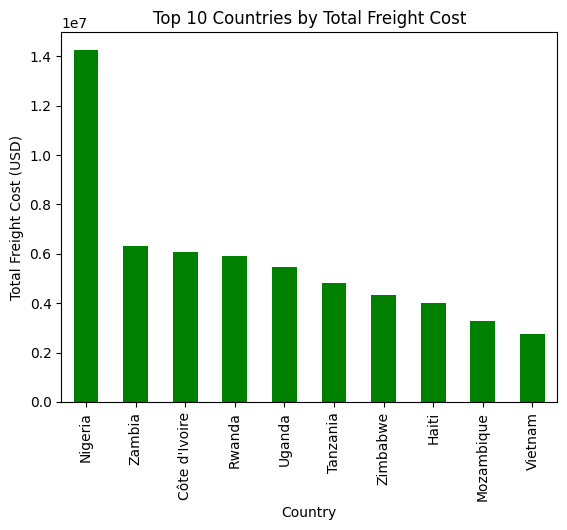

In [ ]:
# Convert 'Freight Cost (USD)' to numeric before applying nlargest
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'], errors='coerce')
total_freight_cost_country = data.groupby('Country')['Freight Cost (USD)'].sum().nlargest(10)
print(total_freight_cost_country)

# Plotting
total_freight_cost_country.plot(kind='bar', color='green')
plt.title('Top 10 Countries by Total Freight Cost')
plt.ylabel('Total Freight Cost (USD)')
plt.show()


**2. What are the top 10 vendors based on freight costs?**

**`Business Insight:`** High freight costs with certain vendors may suggest inefficient supply chains or opportunities for negotiation.

In [ ]:
top_vendors_freight = data.groupby('Vendor')['Freight Cost (USD)'].sum().nlargest(10)
print(top_vendors_freight)


Vendor
SCMS from RDC                                            34854520.36
Orgenics, Ltd                                             9834527.02
Aurobindo Pharma Limited                                  4950613.50
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)     3123023.50
HETERO LABS LIMITED                                       2641009.83
SHANGHAI KEHUA BIOENGINEERING CO.,LTD.  (KHB)             2383953.19
Trinity Biotech, Plc                                      2321168.85
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)           1953114.70
CIPLA LIMITED                                             1889796.42
Standard Diagnostics, Inc.                                1291839.63
Name: Freight Cost (USD), dtype: float64


**3. Which shipment modes are most cost-effective (in terms of freight costs)?**

**Business Insight:** Understanding which shipment modes (e.g., Air, Sea) are the most cost-effective can help in optimizing future shipments.


In [ ]:
avg_freight_cost_mode = data.groupby('Shipment Mode')['Freight Cost (USD)'].mean()
print(avg_freight_cost_mode)


Shipment Mode
Air            10458.960753
Air Charter    21052.142642
Ocean          12733.080816
Truck          10176.405000
Name: Freight Cost (USD), dtype: float64


**4. Is there a correlation between freight cost and weight?**

**Business Insight:** Determining if there's a strong correlation between shipment weight and freight cost can help forecast future shipping costs.

In [ ]:
# Convert 'Freight Cost (USD)' and 'Weight (Kilograms)' columns to numeric, handling errors
# Errors='coerce' will replace non-numeric values with NaN
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'], errors='coerce')
data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'], errors='coerce')
correlation = data['Freight Cost (USD)'].corr(data['Weight (Kilograms)'])
print(f'Correlation between weight and freight cost: {correlation}')

Correlation between weight and freight cost: 0.2320523048718879


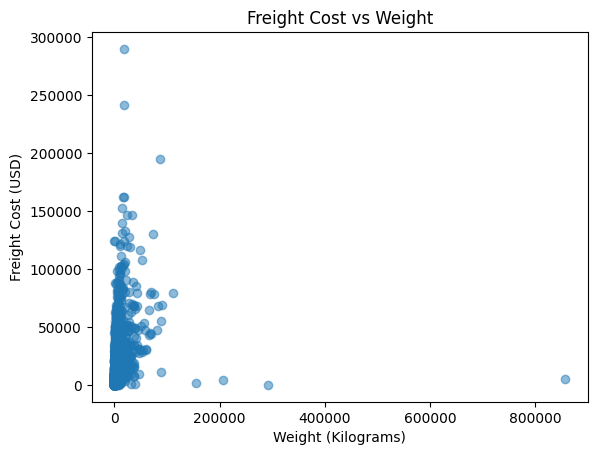

In [ ]:
# Scatter plot
plt.scatter(data['Weight (Kilograms)'], data['Freight Cost (USD)'], alpha=0.5)
plt.title('Freight Cost vs Weight')
plt.xlabel('Weight (Kilograms)')
plt.ylabel('Freight Cost (USD)')
plt.show()

**5. Which INCO terms are associated with the highest freight costs?**

**Business Insight:** Identifying which INCO terms lead to higher costs to optimize terms during contract negotiations.

Vendor INCO Term
N/A - From RDC    34854520.36
EXW               28248651.19
DDP                2499186.51
FCA                2039273.45
CIP                1170620.66
Name: Freight Cost (USD), dtype: float64


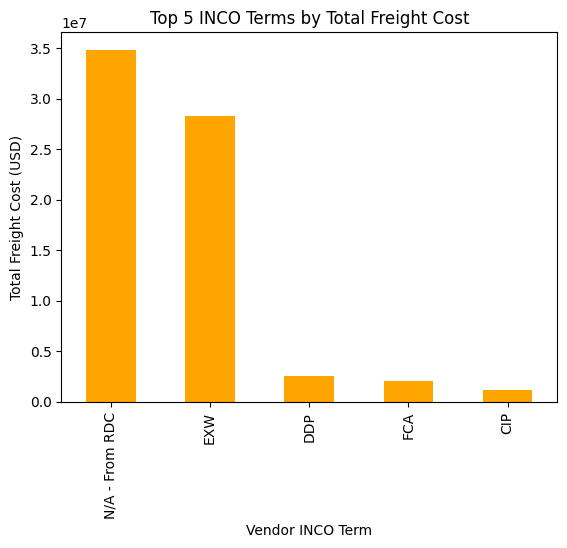

In [ ]:
inco_freight_cost = data.groupby('Vendor INCO Term')['Freight Cost (USD)'].sum().nlargest(5)
print(inco_freight_cost)

# Plotting
inco_freight_cost.plot(kind='bar', color='orange')
plt.title('Top 5 INCO Terms by Total Freight Cost')
plt.ylabel('Total Freight Cost (USD)')
plt.show()


**6. Which countries have the most shipments?**

**Business Insight:** This helps in understanding shipment concentration and potentially optimizing logistics for frequent destinations.

In [ ]:
country_shipments = data['Country'].value_counts().head(10)
print(country_shipments)


Country
South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Name: count, dtype: int64


**7. Which vendors contribute the most to overall shipment volumes?**

**Business Insight:** Recognizing key vendors with high shipment volumes can provide insights for optimizing vendor relationships and negotiations.

In [ ]:
vendor_shipments = data['Vendor'].value_counts().head(10)
print(vendor_shipments)


Vendor
SCMS from RDC                                            5404
Orgenics, Ltd                                             754
S. BUYS WHOLESALER                                        715
Aurobindo Pharma Limited                                  668
Trinity Biotech, Plc                                      356
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)           347
PHARMACY DIRECT                                           326
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)     317
HETERO LABS LIMITED                                       277
CIPLA LIMITED                                             175
Name: count, dtype: int64


**8. What is the average line item quantity per shipment mode?**

**Business Insight:** Different shipment modes may carry different quantities, which could influence future shipping decisions.


In [ ]:
avg_line_item_quantity = data.groupby('Shipment Mode')['Line Item Quantity'].mean()
print(avg_line_item_quantity)


Shipment Mode
Air             9143.640275
Air Charter    45352.953846
Ocean          65314.692722
Truck          26803.161484
Name: Line Item Quantity, dtype: float64


**9. Which manufacturing sites are used most frequently?**

**Business Insight:** Understanding frequently used manufacturing sites may help in evaluating their performance and shipping efficiency.

In [ ]:
top_manufacturing_sites = data['Manufacturing Site'].value_counts().head(10)
print(top_manufacturing_sites)


Manufacturing Site
Aurobindo Unit III, India         3172
Mylan (formerly Matrix) Nashik    1415
Hetero Unit III Hyderabad IN       869
Cipla, Goa, India                  665
Strides, Bangalore, India.         540
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
ABBVIE Ludwigshafen Germany        366
Inverness Japan                    345
ABBVIE (Abbott) Logis. UK          219
Name: count, dtype: int64


**10. What are the top 5 most expensive shipments in terms of freight cost?**

**Business Insight:** Identifying outlier shipments with unusually high freight costs could help in assessing any issues in the shipping process.

In [ ]:
expensive_shipments = data.nlargest(5, 'Freight Cost (USD)')[['PO / SO #', 'Freight Cost (USD)']]
print(expensive_shipments)


        PO / SO #  Freight Cost (USD)
4062  SCMS-198220           289653.20
4307  SCMS-184980           241407.27
8850     SO-48892           194623.44
4218  SCMS-148510           161962.32
6848     SO-44400           161712.87


**11. Which countries receive the heaviest shipments?**

**Business Insight:** This information can help in optimizing logistics strategies for countries with consistently heavier shipments.


In [ ]:
country_weights = data.groupby('Country')['Weight (Kilograms)'].sum().nlargest(10)
print(country_weights)


Country
Nigeria          4127176.0
Zambia           3669842.0
Mozambique       2402456.0
Côte d'Ivoire    2057976.0
South Africa     1697764.0
Zimbabwe         1686240.0
Tanzania         1409825.0
Uganda           1283799.0
Rwanda            948265.0
Vietnam           635573.0
Name: Weight (Kilograms), dtype: float64


**12. How do freight costs compare across different shipment modes?**

**Business Insight:** Comparing average freight costs across different shipment modes can help choose the most cost-effective option.


In [ ]:
avg_freight_cost_mode = data.groupby('Shipment Mode')['Freight Cost (USD)'].mean()
print(avg_freight_cost_mode)


Shipment Mode
Air            10458.960753
Air Charter    21052.142642
Ocean          12733.080816
Truck          10176.405000
Name: Freight Cost (USD), dtype: float64


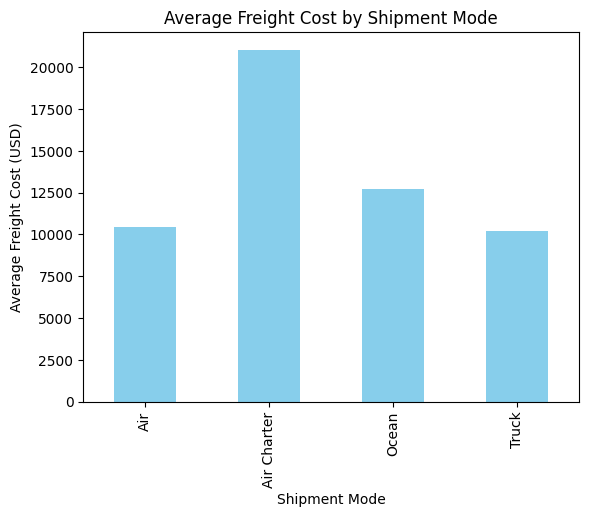

In [ ]:
# Plotting
avg_freight_cost_mode.plot(kind='bar', color='skyblue')
plt.title('Average Freight Cost by Shipment Mode')
plt.ylabel('Average Freight Cost (USD)')
plt.show()

**13. Which shipment modes have the highest average line item values?**

**Business Insight:** Shipment modes carrying high-value items may need enhanced security and monitoring.

In [ ]:
avg_line_item_value = data.groupby('Shipment Mode')['Line Item Value'].mean()
print(avg_line_item_value)


Shipment Mode
Air            102615.072379
Air Charter    379034.201769
Ocean          340102.274367
Truck          207555.607456
Name: Line Item Value, dtype: float64


**14. What are the average freight costs per country?**

**Business Insight:** This can help identify countries where freight costs might be disproportionately high.

In [ ]:
avg_freight_cost_country = data.groupby('Country')['Freight Cost (USD)'].mean()
print(avg_freight_cost_country)


Country
Afghanistan             540.525000
Angola                 4685.242857
Belize                 1959.610000
Benin                  9430.738571
Botswana               2224.680161
Burkina Faso                   NaN
Burundi                5572.184286
Cameroon              32006.276607
Congo, DRC             6721.951058
Côte d'Ivoire          8356.879986
Dominican Republic     8780.877857
Ethiopia              11658.745965
Ghana                 13162.594762
Guatemala              7698.996000
Guinea                 1804.200000
Guyana                 3186.095871
Haiti                 10102.270025
Kazakhstan                     NaN
Kenya                 15703.424615
Kyrgyzstan                     NaN
Lebanon                        NaN
Lesotho                5825.705000
Liberia                3325.141667
Libya                  2090.292500
Malawi                 7172.866429
Mali                   2305.325000
Mozambique             9024.989205
Namibia                5747.992125
Nigeria     

**15. Which shipment modes have the highest insurance costs?**

**Business Insight:** Shipments with high insurance costs could benefit from reviewing the insurance policies used.


In [ ]:
avg_insurance_mode = data.groupby('Shipment Mode')['Line Item Insurance (USD)'].mean()
print(avg_insurance_mode)


Shipment Mode
Air            162.401546
Air Charter    543.556585
Ocean          567.808518
Truck          294.259442
Name: Line Item Insurance (USD), dtype: float64


**16. What is the distribution of shipment weight across different shipment modes?**


**Business Insight:** Understanding weight distribution can help in optimizing which items to send via which mode.

In [ ]:
weight_distribution_mode = data.groupby('Shipment Mode')['Weight (Kilograms)'].sum()
print(weight_distribution_mode)


Shipment Mode
Air            8301064.0
Air Charter    3420128.0
Ocean          1939423.0
Truck          7768994.0
Name: Weight (Kilograms), dtype: float64


**17. What is the average unit price per country?**

**Business Insight:** Different countries might have different pricing strategies; this can help understand global pricing trends.


In [ ]:
avg_unit_price_country = data.groupby('Country')['Unit Price'].mean()
print(avg_unit_price_country)


Country
Afghanistan           0.113333
Angola                0.717143
Belize                0.010000
Benin                 0.257692
Botswana              3.774429
Burkina Faso          0.090000
Burundi               0.566020
Cameroon              0.742133
Congo, DRC            0.516246
Côte d'Ivoire         0.604395
Dominican Republic    0.533654
Ethiopia              3.896111
Ghana                 0.106897
Guatemala             1.590667
Guinea                0.720000
Guyana                0.458819
Haiti                 0.883038
Kazakhstan            3.500000
Kenya                 1.156757
Kyrgyzstan            1.980000
Lebanon               0.000000
Lesotho               2.350000
Liberia               1.066667
Libya                 0.163750
Malawi                0.965714
Mali                  6.107647
Mozambique            0.412298
Namibia               1.134316
Nigeria               0.448978
Pakistan              0.888000
Rwanda                1.393140
Senegal               0.863333


**18. What is the total number of unique vendors?**

**Business Insight:** Knowing how many unique vendors are in the supply chain can provide insights into the complexity of vendor management.

In [ ]:
unique_vendors = data['Vendor'].nunique()
print(f'Total unique vendors: {unique_vendors}')


Total unique vendors: 73


**19. Which vendors provide the most expensive items (by unit price)?**

**Business Insight:** Vendors supplying high-priced items could warrant closer monitoring for quality control and negotiation opportunities.

In [ ]:
top_vendors_unit_price = data.groupby('Vendor')['Unit Price'].mean().nlargest(10)
print(top_vendors_unit_price)


Vendor
BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)      41.680000
BUNDI INTERNATIONAL DIAGNOSTICS LTD               37.500000
SHANGHAI KEHUA BIOENGINEERING CO.,LTD.  (KHB)     24.085714
AHN (PTY) LTD (AKA UCB (S.A.)                      7.000000
BIO-RAD LABORATORIES (FRANCE)                      6.249286
Orasure Technologies Inc.                          5.337321
WAGENIA                                            4.330000
PLURIPHARM S.A.                                    2.700000
BIOLYTICAL LABORATORIES INC.                       2.540000
TURE PHARMACEUTICALS & MEDICAL SUPPLIES P.L.C.     2.393333
Name: Unit Price, dtype: float64


**20. What are the top 5 INCO terms by total shipment volume?**


**Business Insight:** Frequently used INCO terms can give insight into the preferred shipping terms used by FedEx and its partners.

In [ ]:
top_inco_terms = data['Vendor INCO Term'].value_counts().head(5)
print(top_inco_terms)


Vendor INCO Term
N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
Name: count, dtype: int64


**GitHub**

In [ ]:
#github link

**Conclusion**

By performing exploratory data analysis on the FedEx logistics dataset, we were able to provide actionable insights into the company’s global supply chain operations. This data-driven approach will allow FedEx to make informed decisions to optimize shipment methods, reduce costs, and improve overall delivery efficiency.